In [2]:
#In this cell all libraries used in the notebook are loaded
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import timeit

from ema_workbench import (Model, CategoricalParameter, SequentialEvaluator, MultiprocessingEvaluator, Policy, Scenario, perform_experiments,
                           ScalarOutcome, IntegerParameter, RealParameter, save_results, load_results)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
import copy

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
#Here the problem formulation created by group 22 is called as the dike model, and uncertainties and levers are connected to the Workbench
dike_model, planning_steps = get_model_for_problem_formulation(6)
uncertainties = dike_model.uncertainties
levers = dike_model.levers

In [3]:
#This creates a policy where all dikes are set to a multiple of 2
full_dike_policies = [Policy('full dike policy2', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':2, 
                                      'A.1_DikeIncrease 1':2, 
                                      'A.1_DikeIncrease 2':2,
                                      'A.2_DikeIncrease 0':2,
                                      'A.2_DikeIncrease 1':2,
                                      'A.2_DikeIncrease 2':2,
                                      'A.3_DikeIncrease 0':2,
                                      'A.3_DikeIncrease 1':2,
                                      'A.3_DikeIncrease 2':2,
                                      'A.4_DikeIncrease 0':2,
                                      'A.4_DikeIncrease 1':2,
                                      'A.4_DikeIncrease 2':2,
                                      'A.5_DikeIncrease 0':2,
                                      'A.5_DikeIncrease 1':2,
                                      'A.5_DikeIncrease 2':2}),
                   Policy('full dike policy4', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':4, 
                                      'A.1_DikeIncrease 1':4, 
                                      'A.1_DikeIncrease 2':4,
                                      'A.2_DikeIncrease 0':4,
                                      'A.2_DikeIncrease 1':4,
                                      'A.2_DikeIncrease 2':4,
                                      'A.3_DikeIncrease 0':4,
                                      'A.3_DikeIncrease 1':4,
                                      'A.3_DikeIncrease 2':4,
                                      'A.4_DikeIncrease 0':4,
                                      'A.4_DikeIncrease 1':4,
                                      'A.4_DikeIncrease 2':4,
                                      'A.5_DikeIncrease 0':4,
                                      'A.5_DikeIncrease 1':4,
                                      'A.5_DikeIncrease 2':4}),
                   Policy('full dike policy6', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':6, 
                                      'A.1_DikeIncrease 1':6, 
                                      'A.1_DikeIncrease 2':6,
                                      'A.2_DikeIncrease 0':6,
                                      'A.2_DikeIncrease 1':6,
                                      'A.2_DikeIncrease 2':6,
                                      'A.3_DikeIncrease 0':6,
                                      'A.3_DikeIncrease 1':6,
                                      'A.3_DikeIncrease 2':6,
                                      'A.4_DikeIncrease 0':6,
                                      'A.4_DikeIncrease 1':6,
                                      'A.4_DikeIncrease 2':6,
                                      'A.5_DikeIncrease 0':6,
                                      'A.5_DikeIncrease 1':6,
                                      'A.5_DikeIncrease 2':6}),
                   Policy('full dike policy8', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':8, 
                                      'A.1_DikeIncrease 1':8, 
                                      'A.1_DikeIncrease 2':8,
                                      'A.2_DikeIncrease 0':8,
                                      'A.2_DikeIncrease 1':8,
                                      'A.2_DikeIncrease 2':8,
                                      'A.3_DikeIncrease 0':8,
                                      'A.3_DikeIncrease 1':8,
                                      'A.3_DikeIncrease 2':8,
                                      'A.4_DikeIncrease 0':8,
                                      'A.4_DikeIncrease 1':8,
                                      'A.4_DikeIncrease 2':8,
                                      'A.5_DikeIncrease 0':8,
                                      'A.5_DikeIncrease 1':8,
                                      'A.5_DikeIncrease 2':8}),
                   Policy('full dike policy10', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':0,
                                      '2_RfR 1':0,
                                      '2_RfR 2':0, 
                                      '3_RfR 0':0, 
                                      '3_RfR 1':0, 
                                      '3_RfR 2':0, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':10, 
                                      'A.1_DikeIncrease 1':10, 
                                      'A.1_DikeIncrease 2':10,
                                      'A.2_DikeIncrease 0':10,
                                      'A.2_DikeIncrease 1':10,
                                      'A.2_DikeIncrease 2':10,
                                      'A.3_DikeIncrease 0':10,
                                      'A.3_DikeIncrease 1':10,
                                      'A.3_DikeIncrease 2':10,
                                      'A.4_DikeIncrease 0':10,
                                      'A.4_DikeIncrease 1':10,
                                      'A.4_DikeIncrease 2':10,
                                      'A.5_DikeIncrease 0':10,
                                      'A.5_DikeIncrease 1':10,
                                      'A.5_DikeIncrease 2':10})]

In [4]:
tic=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=full_dike_policies)
toc=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 5 policies * 1 model(s) = 5000 experiments
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1500 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 2500 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 3500 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 4500 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
save_results(results, 'full_dike_policies.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\full_dike_policies.tar.gz


[MainProcess/INFO] results loaded succesfully from C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\full_dike_policies.tar.gz
C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


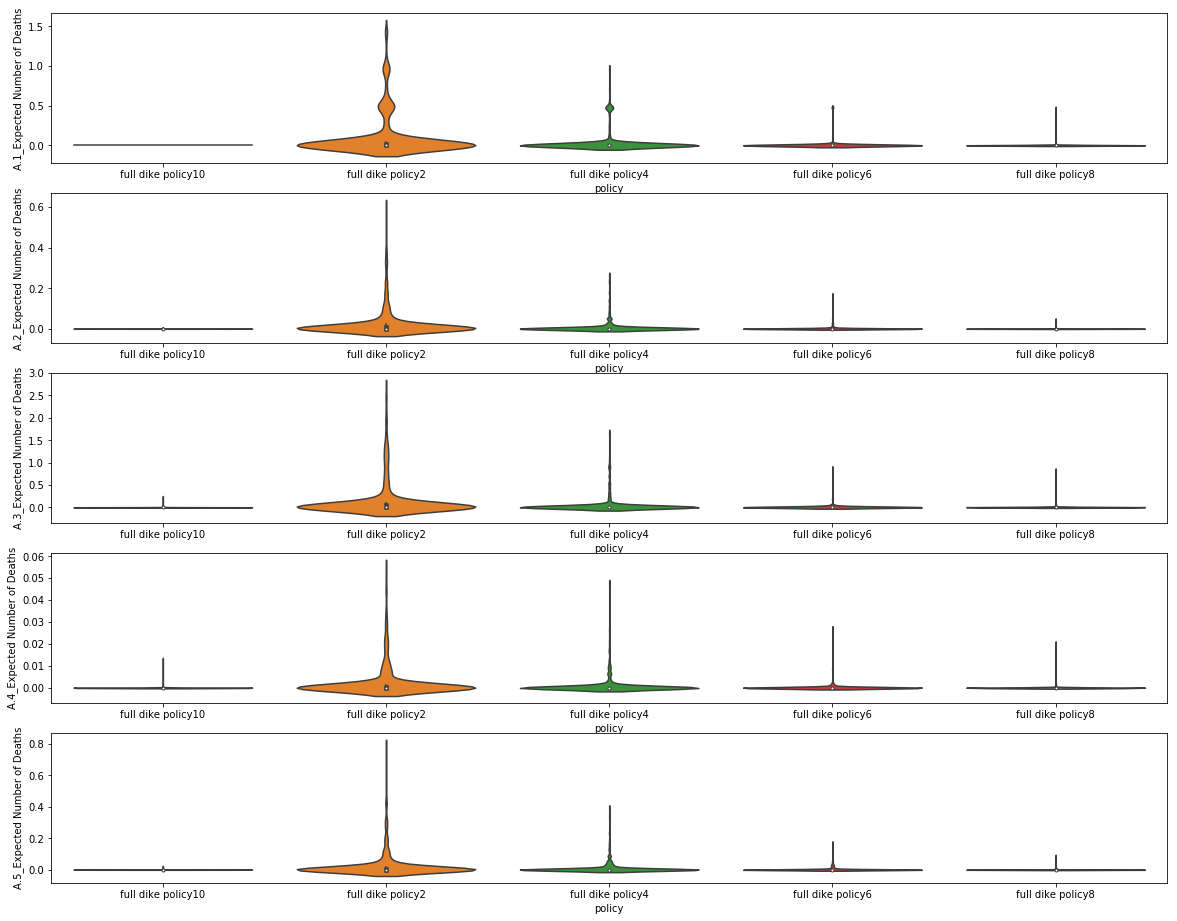

In [8]:
# A plot is created where the deaths per location and per policy are shown as violin plot. For some reason, it starts with policy10
experiments, outcomes = load_results('full_dike_policies.tar.gz')
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
fig, ax = plt.subplots(figsize=(20,16))
for i in range(1,6):
    plt.subplot(510+i)
    sns.violinplot(data=data, y='A.{}_Expected Number of Deaths'.format(i), x='policy', scale='width');

In [11]:
#This was written to quickly check the total expected scenarios with deaths over 0.01, because of duplicate scenarios it can be more than 1000.
total_deaths2 = sum(data['A.1_Expected Number of Deaths'][0:1000] > 0.01) +sum(data['A.2_Expected Number of Deaths'][0:1000] > 0.01)+sum(data['A.3_Expected Number of Deaths'][0:1000] > 0.01)+sum(data['A.4_Expected Number of Deaths'][0:1000] > 0.01)+sum(data['A.5_Expected Number of Deaths'][0:1000]> 0.01)
total_deaths4 = sum(data['A.1_Expected Number of Deaths'][1000:2000] > 0.01) +sum(data['A.2_Expected Number of Deaths'][1000:2000] > 0.01)+sum(data['A.3_Expected Number of Deaths'][1000:2000] > 0.01)+sum(data['A.4_Expected Number of Deaths'][1000:2000] > 0.01)+sum(data['A.5_Expected Number of Deaths'][1000:2000]> 0.01)
total_deaths6 = sum(data['A.1_Expected Number of Deaths'][2000:3000] > 0.01) +sum(data['A.2_Expected Number of Deaths'][2000:3000] > 0.01)+sum(data['A.3_Expected Number of Deaths'][2000:3000] > 0.01)+sum(data['A.4_Expected Number of Deaths'][2000:3000] > 0.01)+sum(data['A.5_Expected Number of Deaths'][2000:3000]> 0.01)
total_deaths8 = sum(data['A.1_Expected Number of Deaths'][3000:4000] > 0.01) +sum(data['A.2_Expected Number of Deaths'][3000:4000] > 0.01)+sum(data['A.3_Expected Number of Deaths'][3000:4000] > 0.01)+sum(data['A.4_Expected Number of Deaths'][3000:4000] > 0.01)+sum(data['A.5_Expected Number of Deaths'][3000:4000]> 0.01)
total_deaths10 = sum(data['A.1_Expected Number of Deaths'][4000:5000] > 0.01) +sum(data['A.2_Expected Number of Deaths'][4000:5000] > 0.01)+sum(data['A.3_Expected Number of Deaths'][4000:5000] > 0.01)+sum(data['A.4_Expected Number of Deaths'][4000:5000] > 0.01)+sum(data['A.5_Expected Number of Deaths'][4000:5000]> 0.01)
print(total_deaths2, total_deaths4, total_deaths6, total_deaths8, total_deaths10)

1238 589 221 52 8


In [7]:
costs = pd.DataFrame(outcomes, columns = ['Dike Investment Costs'])
costs['policy'] = experiments['policy']
short = costs.drop_duplicates(['Dike Investment Costs', 'policy'])
short

,Dike Investment Costs,policy
0,4.407179e+08,full dike policy2
1000,5.892366e+08,full dike policy4
2000,7.849920e+08,full dike policy6
3000,1.043000e+09,full dike policy8
4000,1.383105e+09,full dike policy10


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


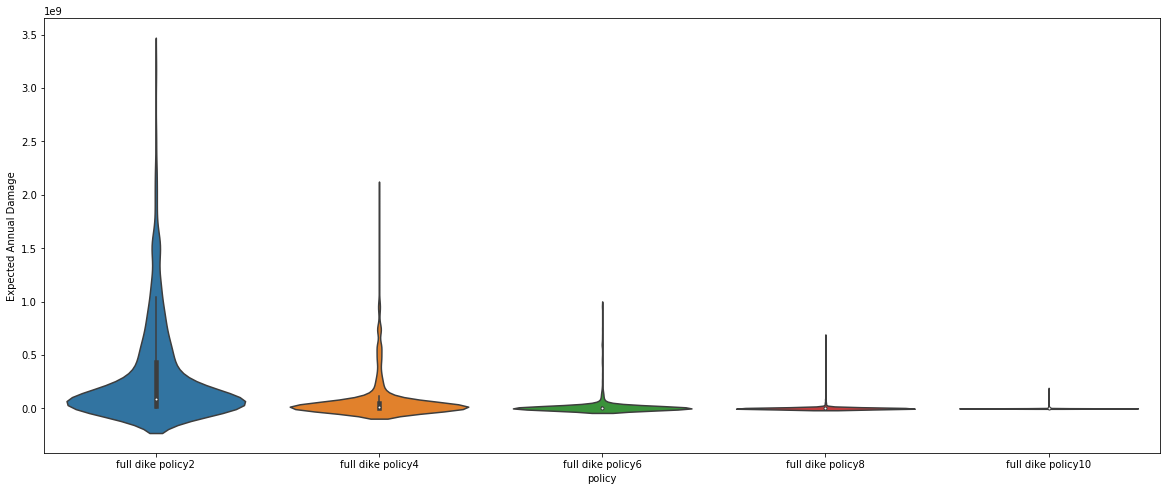

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
sns.violinplot(data=data, y='Expected Annual Damage', x='policy', scale='width');

In [9]:
damage = outcomes['Expected Annual Damage'][3000:4000] > 1e8
print('Fraction of solutions with more than 1e8 damage:',  sum(damage)/10000)

Fraction of solutions with more than 1e8 damage: 0.0004
